# Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 

# Carregando dados

In [3]:
df = pd.read_csv('BancoDeDados.csv')
df 

,amostra,id_cliente,id_unico_cliente,item_id,cep_cliente,cidade_cliente,estado_cliente,id_pedido,status_pedido,horario_pedido,...,pagamento_sequencial,pagamento_tipo,pagamento_prestacoes,pagamento_valor,review,categoria,categoria_ingles,cep_vendedor,cidade_vendedor,estado_vendedor
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,1,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,...,1,credit_card,2,146.87,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
1,1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,1,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,...,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
2,2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,2,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,...,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
3,3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,1,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,...,1,credit_card,7,140.61,3,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
4,4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,1,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,...,1,credit_card,10,137.58,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116576,116576,ce2172509c4149d65212484eb761bc37,c5da6424f1f5decedef8672a1a0103e1,1,88350,brusque,SC,edcf1e1eeb52381be9388c90152be52d,delivered,2018-08-21 11:29:05,...,1,credit_card,5,314.32,5,artes_e_artesanato,arts_and_craftmanship,95910,lajeado,RS
116577,116577,ee1cfdc92e449920e25d3ca4ab4da4f6,8d80e477643ec569b24592ce3d9dfc4c,1,9951,diadema,SP,2ef4a11b6e24fdfbb43b92cb5f95edff,delivered,2018-07-23 18:35:14,...,1,credit_card,1,84.63,3,artes_e_artesanato,arts_and_craftmanship,17201,jau,SP
116578,116578,ee1cfdc92e449920e25d3ca4ab4da4f6,8d80e477643ec569b24592ce3d9dfc4c,2,9951,diadema,SP,2ef4a11b6e24fdfbb43b92cb5f95edff,delivered,2018-07-23 18:35:14,...,1,credit_card,1,84.63,3,artes_e_artesanato,arts_and_craftmanship,17201,jau,SP
116579,116579,ab0cf72dfe0538a63a57d6905ccb7b57,8c3c961a52bb5a0ffbce1d4e6d25cd67,1,35930,joao monlevade,MG,2c12150c742ae2fa48bc703964c16c5f,delivered,2018-07-28 17:55:27,...,1,credit_card,7,77.50,5,artes_e_artesanato,arts_and_craftmanship,17201,jau,SP


#  Análise Exploratória dos Dados

In [4]:
#abro uma funcao em grafico de barras para entender os valores percentuais
# dos estados 

def plot_perc(st,dados):
    plt.figure(figsize=(20,8))

    g = sns.countplot(x=st, data=dados, orient='h')
    g.set_title("Distribuição do estado dos clientes", fontsize=20)
    g.set_xlabel("Estado", fontsize=17)
    g.set_ylabel("Contagem", fontsize=17)
    g.set_xticklabels(g.get_xticklabels(),rotation=45)
    sizes = []
    for p in g.patches:
        height = p.get_height()
        sizes.append(height)
        g.text(p.get_x()+p.get_width()/1.6,
            height + 200,
            '{:1.2f}%'.format(height/116581*100),
            ha="center", va='bottom',fontsize=12) 
    g.set_ylim(0, max(sizes) * 1.1)

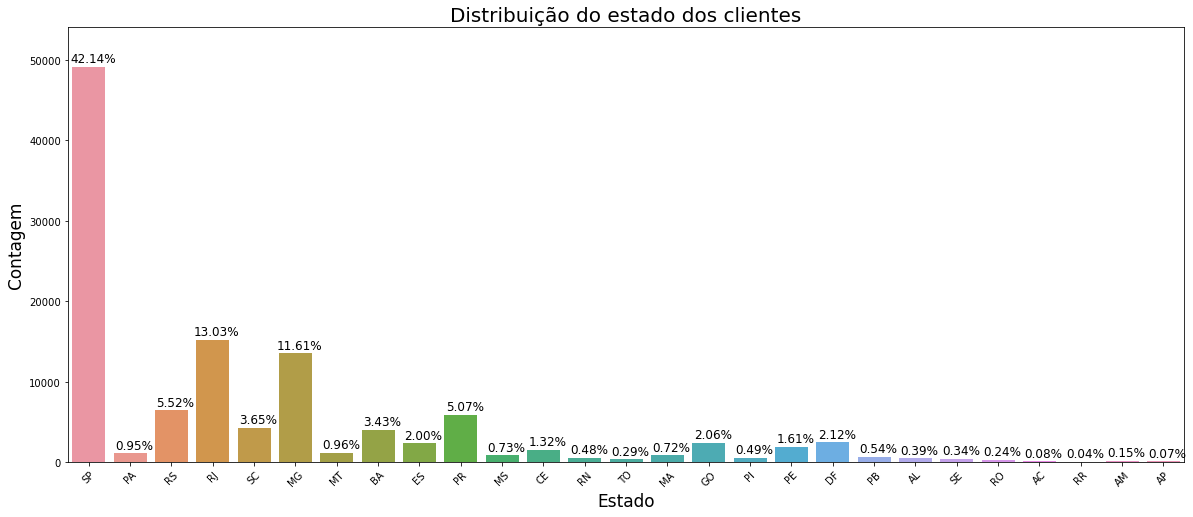

In [5]:
#Distribuicao por estado

plot_perc('estado_cliente',df)

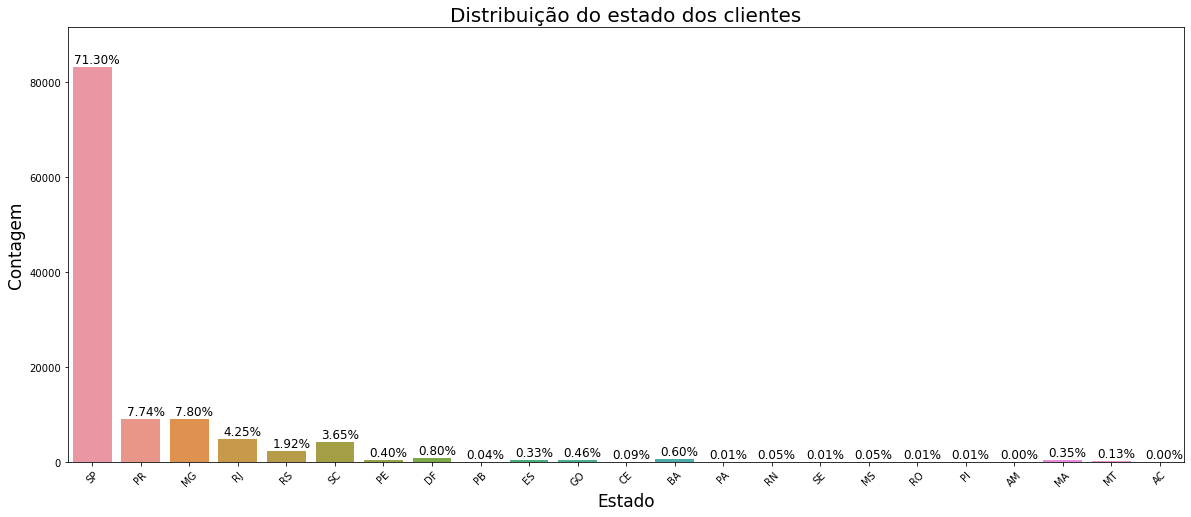

In [6]:
#distribuicao por estados de clientes 


plot_perc('estado_vendedor',df)

- Identifiquei primeiramente que a maioria dos clientes realiza compras por cartão de crédito, 
- posteriormente por boleto, voucher e cartão de débito. Seria interessante aumentar as promoções para pagamento à vista (para aumento dos pagamentos com boleto ou cartão de débito).
- Também percebe-se que a maioria dos vendedores e compradores estão em SP.
- Também vou criar um novo banco de dados apenas com as informações que vou precisar para fazer a análise de recẽncia, frequência e receita.

In [7]:
#construção do banco de dados com os dados que eu quero utiliza 

df_olist = df[['id_unico_cliente', 'id_cliente', 'horario_pedido', 'item_id', 'preco']]

In [8]:
#construção do banco de dados com os dados que eu quero utiliza 
df_compra = df.groupby('id_unico_cliente').horario_pedido.max().reset_index()
df_compra.columns = ['id_unico_cliente', 'DataMaxCompra']

In [9]:
df_compra['DataMaxCompra']= pd.to_datetime(df_compra['DataMaxCompra']) 

- Defino gora as três variáveis que utilizaremos para segmentação: recência, frequência e receita. Em inglês, é chamado de método RFM
- Recência: quão recentemente um cliente fez uma compra
- Frequência: com que frequência um cliente faz uma compra
- Receita: quanto dinheiro um cliente gasta em compras.

In [10]:
#seleciona o ponto de observação como a data máxima de compra em df
df_compra['Recencia'] = (df_compra['DataMaxCompra'].max() - df_compra['DataMaxCompra']).dt.days

#junta esse df com o  novo chamado df_user
df_usuario = pd.merge(df_olist, df_compra[['id_unico_cliente','Recencia']], on='id_unico_cliente')

df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211


In [11]:
# ploto a distribuição da feature continua que acabo de identificar
#def dist(dados):
#    sns.set(palette='muted', color_codes=True, style='white')
#    fig, ax = plt.subplots(figsize=(12, 6))
#    sns.despine(left=True)
#    sns.distplot(dados, bins=30)
#    plt.show()

In [12]:
def calcular_wcss(data):
    wcss = []
    for k in range(1, 10):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X=data)
        data["clusters"] = kmeans.labels_
        wcss.append(kmeans.inertia_)
    return wcss

- Aplico o o Método Cotovelo, a ideia é rodar o KMeans para várias quantidades diferentes de clusters 
- e dizer qual dessas quantidades é o número ótimo de clusters. Usando a "regra do cotovelo", identifico que a partir de 4 clusters teremos bons resultados. Vou usar 5 apenas para garanti

In [13]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.cluster import KMeans

df_recencia = df_usuario[['Recencia']]
soma_quadrados = calcular_wcss(df_recencia)

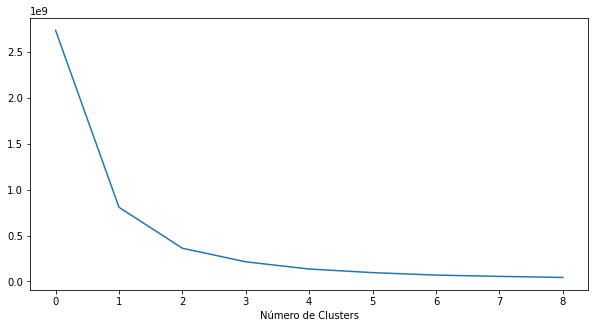

In [14]:
#Plote do metodo cotovelo 

plt.figure(figsize=(10, 5))
plt.plot(soma_quadrados)
plt.xlabel("Número de Clusters")
plt.show()

In [15]:
import math
def numero_otimo_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distancias = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerador = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominador = math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distancias.append(numerador/denominador)
    
    return distancias.index(max(distancias)) + 2

In [16]:
# calculando a soma dos quadrados para as quantidade de clusters
soma_quadrados = calcular_wcss(df_recencia)

# calculando a quantidade ótima de clusters
n = numero_otimo_clusters(soma_quadrados)

In [17]:
# rodando o kmeans para  quantidade ótima de clusters
kmeans = KMeans(n_clusters=4)
df_usuario['RecenciaCluster'] = kmeans.fit_predict(df_recencia)

In [18]:
#função para ordenar o número de clusters 
def ordenar_cluster(cluster_nome, target_nome,df,ascending):
    novo_nome = 'novo' + cluster_nome
    agrupado_por_cluster = df.groupby(cluster_nome)[target_nome].mean().reset_index()
    agrupado_por_cluster_ordenado = agrupado_por_cluster.sort_values(by=target_nome,
                                                                     ascending=ascending).reset_index(drop=True)
    agrupado_por_cluster_ordenado['index'] = agrupado_por_cluster_ordenado.index
    juntando_cluster = pd.merge(df,agrupado_por_cluster_ordenado[[cluster_nome,'index']], on=cluster_nome)
    removendo_dados = juntando_cluster.drop([cluster_nome],axis=1)
    df_final = removendo_dados.rename(columns={"index":cluster_nome})
    return df_final

df_usuario = ordenar_cluster('RecenciaCluster', 'Recencia',df_usuario,False)

In [19]:
df_usuario.groupby('RecenciaCluster')['Recencia'].describe()

,count,mean,std,min,25%,50%,75%,max
RecenciaCluster,,,,,,,,
0,20697.0,489.070832,59.862148,404.0,441.0,480.0,532.0,728.0
1,30695.0,318.687376,43.450070,253.0,281.0,312.0,355.0,403.0
2,33601.0,187.076277,35.024122,127.0,157.0,187.0,217.0,252.0
3,31588.0,66.405850,35.800016,0.0,33.0,67.0,99.0,126.0


In [20]:
# crio um df com a quantidade de ordens para cada cliente
df_frequencia = df.groupby('id_unico_cliente').pedido_aprovado.count().reset_index()
df_frequencia.columns = ['id_unico_cliente','Frequencia']

# adiciono esses dados em df principal
df_usuario = pd.merge(df_usuario, df_frequencia, on='id_unico_cliente')

In [21]:
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster,Frequencia
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0,1
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0,1
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0,1
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0,1
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0,1


In [22]:
# rodo o kmeans para quantidade ótima de clusters
df_frequencia = df_usuario[['Frequencia']]
kmeans = KMeans(n_clusters=4)
df_usuario['FrequenciaCluster'] = kmeans.fit_predict(df_frequencia)

In [23]:
# ordena os clusters de frequência
df_usuario.groupby('FrequenciaCluster')['Frequencia'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequenciaCluster,,,,,,,,
0,106570.0,1.306343,0.570539,0.0,1.0,1.0,2.0,3.0
1,514.0,24.447471,5.669776,16.0,20.0,24.0,24.0,38.0
2,9422.0,5.848015,2.496369,4.0,4.0,5.0,6.0,15.0
3,75.0,75.000000,0.000000,75.0,75.0,75.0,75.0,75.0


In [24]:
#calcula a receita para cada cliente
df_receita = df.groupby('id_unico_cliente').pagamento_valor.sum().reset_index()

#junta com o df principal
df_usuario = pd.merge(df_usuario, df_receita, on='id_unico_cliente')

In [25]:
# rodando o kmeans para  quantidade ótima de clusters
df_pagamento = df_usuario[['pagamento_valor']]
kmeans = KMeans(n_clusters=4)
df_usuario['ReceitaCluster'] = kmeans.fit_predict(df_pagamento)

In [26]:
#ordena os clusters
df_usuario.groupby('ReceitaCluster')['pagamento_valor'].describe()

,count,mean,std,min,25%,50%,75%,max
ReceitaCluster,,,,,,,,
0,114709.0,256.843780,360.390633,9.59,69.85,132.49,268.77,2869.25
1,199.0,26914.634523,10065.864450,16313.60,19167.26,22346.60,30186.00,45256.00
2,1665.0,5510.153423,2784.346269,2889.60,3472.96,4345.50,6718.39,14963.64
3,8.0,109312.640000,0.000000,109312.64,109312.64,109312.64,109312.64,109312.64


In [27]:
df_final = df_usuario.drop(['id_cliente','horario_pedido','item_id','preco'],axis=1)
df_final.head()

,id_unico_cliente,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,pagamento_valor,ReceitaCluster
0,861eff4711a542e4b93843c6dd7febb0,474,0,1,0,146.87,0
1,3c799d181c34d51f6d44bbbc563024db,483,0,1,0,140.61,0
2,567ab47ca4deb92d46dbf54dce07d0a7,528,0,1,0,142.05,0
3,f40ab89b622248b7ca125af4b486b887,474,0,1,0,155.70,0
4,749943913a9851a39c9baf51877fbab6,533,0,1,0,148.33,0


In [29]:
#renomeando as colunas
df_final.columns = ['Id_unico_cliente', 'Recencia', 'RecenciaCluster', 'Frequencia', 'FrequenciaCluster', 'Receita', 'ReceitaCluster']
df_final.head()

,Id_unico_cliente,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita,ReceitaCluster
0,861eff4711a542e4b93843c6dd7febb0,474,0,1,0,146.87,0
1,3c799d181c34d51f6d44bbbc563024db,483,0,1,0,140.61,0
2,567ab47ca4deb92d46dbf54dce07d0a7,528,0,1,0,142.05,0
3,f40ab89b622248b7ca125af4b486b887,474,0,1,0,155.70,0
4,749943913a9851a39c9baf51877fbab6,533,0,1,0,148.33,0


In [30]:
df_final = ordenar_cluster('FrequenciaCluster', 'ReceitaCluster',df_final,False)

Calculo a pontuação geral do cliente baseado nesses clusters e também defino 4 opções: inativo, business, master e premium

In [31]:
df_final['Pontuacao'] = df_usuario['RecenciaCluster'] + df_usuario['FrequenciaCluster'] + df_usuario['ReceitaCluster']
df_final.groupby('Pontuacao')['Recencia','Frequencia','Receita'].mean()
df_final.head()

,Id_unico_cliente,Recencia,RecenciaCluster,Frequencia,Receita,ReceitaCluster,FrequenciaCluster,Pontuacao
0,861eff4711a542e4b93843c6dd7febb0,474,0,1,146.87,0,2,0
1,3c799d181c34d51f6d44bbbc563024db,483,0,1,140.61,0,2,0
2,567ab47ca4deb92d46dbf54dce07d0a7,528,0,1,142.05,0,2,0
3,f40ab89b622248b7ca125af4b486b887,474,0,1,155.70,0,2,0
4,749943913a9851a39c9baf51877fbab6,533,0,1,148.33,0,2,0


In [32]:
df_final['Segmento'] = 'Inativo'

In [33]:
df_final.loc[df_final['Pontuacao']>=3,'Segmento'] = 'Business' 
df_final.loc[df_final['Pontuacao']>=6,'Segmento'] = 'Master' 
df_final.loc[df_final['Pontuacao']>=8,'Segmento'] = 'Premium' 

In [34]:
df_final.to_csv('RFM.csv')

In [35]:
def plot_segmento(x,y,data):
    sns.set(palette='muted', color_codes=True, style='whitegrid')
    fig, axs = plt.subplots(1, 1, figsize=(7, 5))
    sns.despine(left=True)
    sns.scatterplot(x=x, y=y, hue='Segmento', data=data, size='Segmento', sizes=(50,150), size_order=['Premium','Master','Business','Inativo'])
    axs.set_title('Segmento de Cliente')
    plt.show()

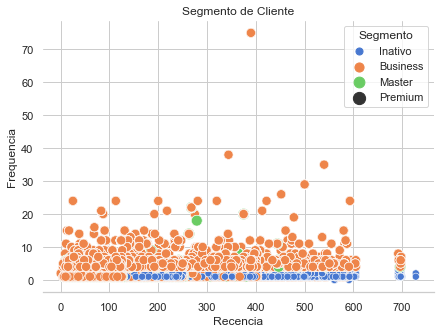

In [36]:
plot_segmento('Recencia','Frequencia',df_final)

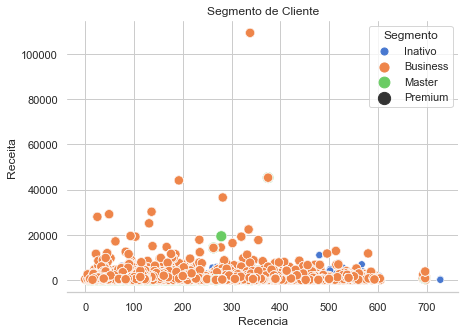

In [38]:

plot_segmento('Recencia','Receita',df_final)

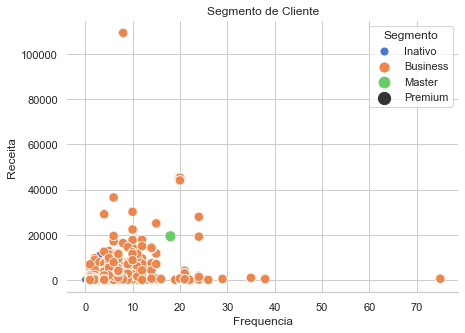

In [39]:
plot_segmento('Frequencia','Receita',df_final)